  <h2>Wczytywanie bibliotek</h2>

In [87]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
import os

random.seed(42)


In [88]:
train = pd.read_csv('D:/05-Szkola/dane_inz/UNSW_NB15_training-set.csv')
test = pd.read_csv('D:/05-Szkola/dane_inz/UNSW_NB15_testing-set.csv')


In [89]:
data = pd.concat([train,test]).reset_index(drop=True)
#leaving only normal and DoS data
data = data[data['attack_cat'].isin(['Normal', 'DoS'])]
cols_cat = data.select_dtypes('object').columns 
cols_numeric = data._get_numeric_data().columns 


In [90]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,109353.000000,109353.000000,109353.000000,109353.000000,1.093530e+05,1.093530e+05,1.093530e+05,109353.000000,109353.000000,1.093530e+05,...,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000,109353.000000
mean,46356.251900,1.229760,27.047872,31.266970,6.226179e+03,2.548154e+04,3.851711e+04,115.223606,77.496411,4.376300e+07,...,1.830878,1.290564,4.008596,0.012263,0.012336,0.137637,4.026977,5.366007,0.033634,0.149543
std,32861.363364,5.762437,106.350786,150.418904,1.211829e+05,1.992933e+05,1.134210e+05,107.352027,100.800574,1.745830e+08,...,2.306730,1.608228,5.334296,0.110224,0.111043,0.615860,4.152302,5.484808,0.180287,0.356625
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,23767.000000,0.001036,2.000000,2.000000,2.000000e+02,8.600000e+01,2.865123e+01,31.000000,29.000000,1.151318e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,37436.000000,0.037116,10.000000,8.000000,8.640000e+02,3.540000e+02,1.396927e+03,31.000000,29.000000,4.502699e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000
75%,71429.000000,0.710897,22.000000,18.000000,2.558000e+03,3.380000e+03,4.681497e+03,254.000000,60.000000,1.737126e+06,...,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,5.000000,7.000000,0.000000,0.000000
max,175249.000000,59.999989,8669.000000,11018.000000,1.163118e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.344000e+09,...,46.000000,46.000000,63.000000,2.000000,2.000000,16.000000,47.000000,62.000000,1.000000,1.000000


In [91]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [92]:
#sprawdzanie i usuwanie brakujach wartosci
print(data.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<Axes: >

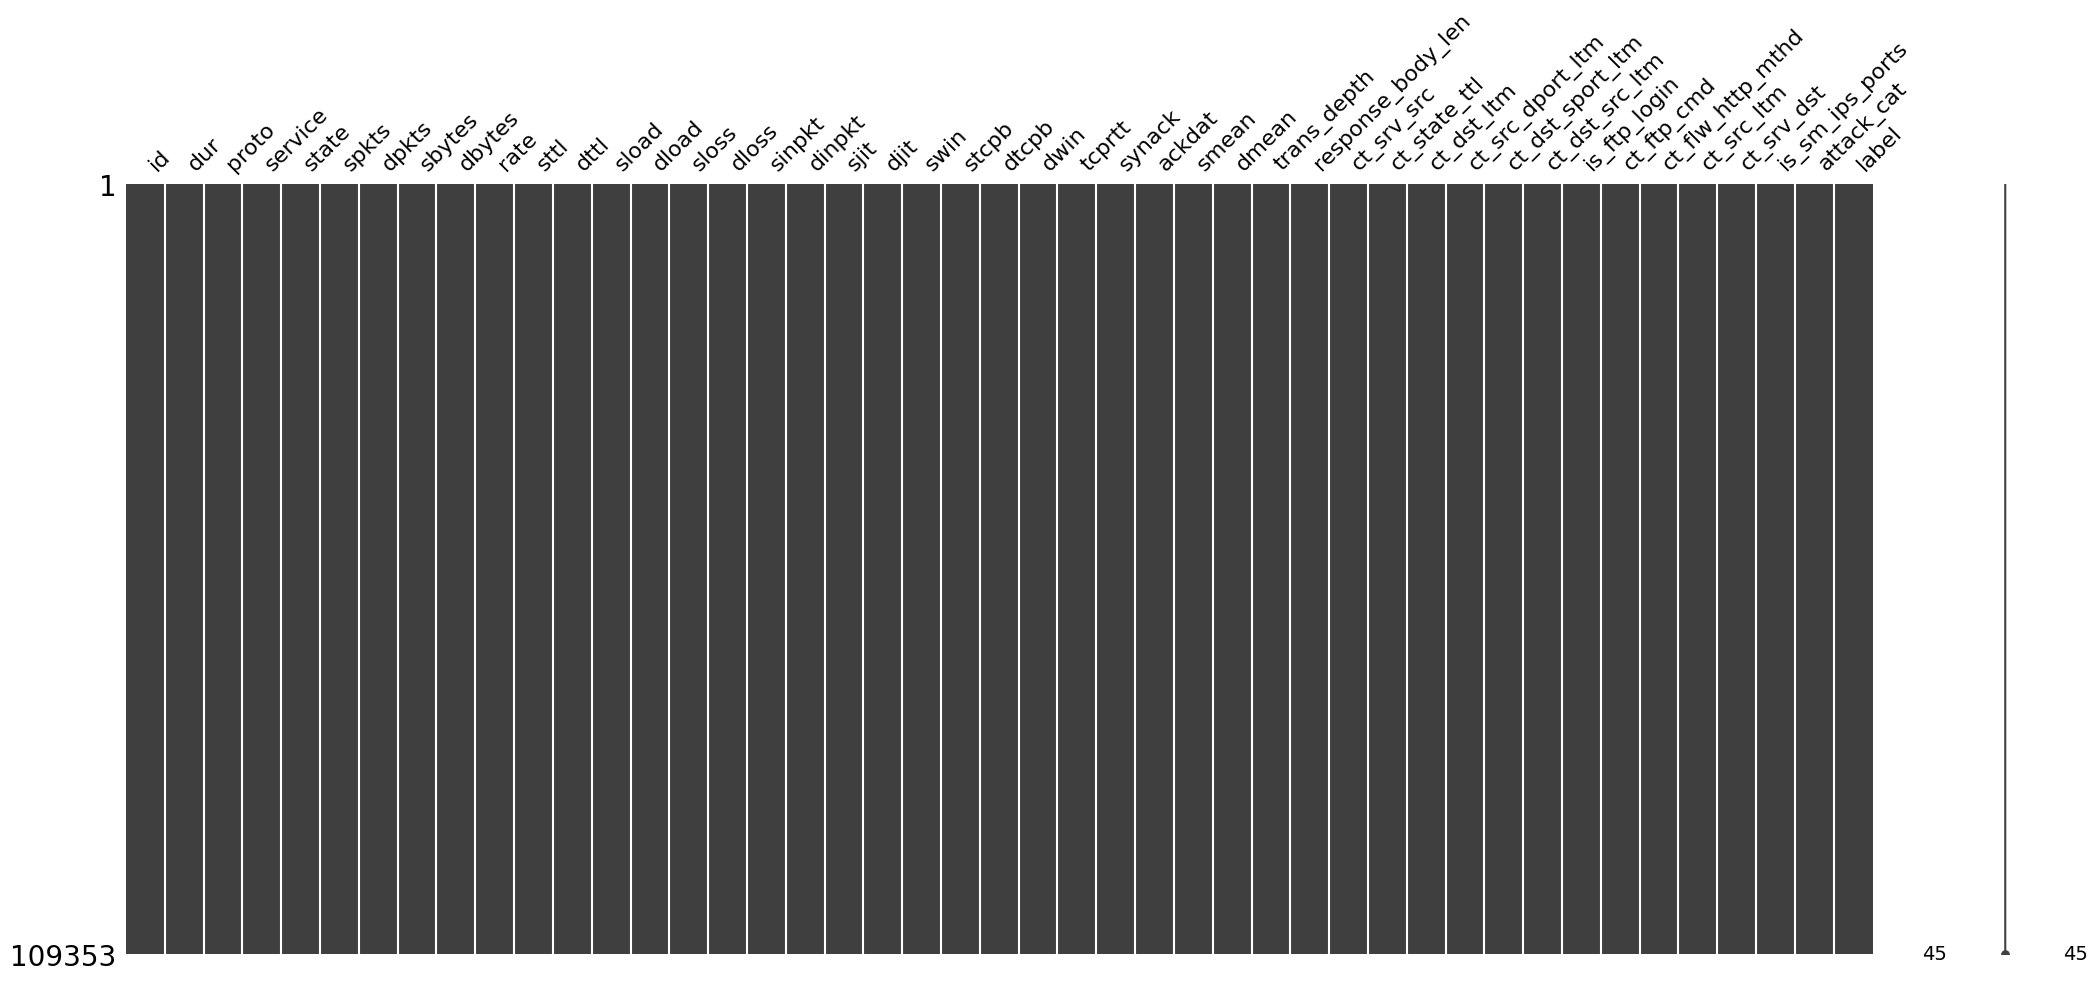

In [93]:
missingno.matrix(data)

<h3>sprawdzamy naglowki tabel</h3>

In [94]:
data['proto'].unique()


array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'ip', 'ipnip', 'st2', 'argus',
       'egp', 'nvp', 'pup', 'mux', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'mfe-nsp', 'merit-inp',
       '3pc', 'ddp', 'idpr-cmtp', 'tp++', 'sdrp', 'ipv6-frag',
       'ipv6-route', 'idrp', 'gre', 'mhrp', 'i-nlsp', 'rvd', 'mobile',
       'narp', 'skip', 'sctp', 'ipv6-no', 'ipv6-opts', 'sat-expak',
       'ippc', 'kryptolan', 'any', 'sat-mon', 'cpnx', 'wsn', 'pvp',
       'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'nsfnet-igp',
       'dgp', 'larp', 'mtp', 'ax.25', 'ipip', 'aes-sp3-d', 'pri-enc',
       'gmtp', 'ifmp', 'pnni', 'ggp', 'cbt', 'bbn-rcc', 'emcon', 'igp',
       'xnet', 'dcn', 'bna', 'swipe', 'chaos', 'cftp', 'visa', 'ipcv',
       'cphb', 'iso-tp4', 'netblt', 'wb-expak', 'sep', 'secure-vmtp',
       'vines', 'il', 'eigrp', 'tcf', 'sprite-rpc', 'tlsp', 'unas', 'rdp',
       'idpr', 'ipv6', 'rsvp', 'iso-ip', 'micp', 'encap', 'etherip',
       'pim', 'ar

In [95]:
data['service'].unique() 
data['service']= np.where(data['service'] == '-', 'None', data['service'])
print(data['service'].unique())

['None' 'http' 'snmp' 'smtp' 'pop3' 'ftp' 'ftp-data' 'dns' 'ssl' 'dhcp'
 'irc' 'ssh' 'radius']


In [96]:
data['state'].unique()


array(['INT', 'FIN', 'REQ', 'CON', 'RST', 'ACC', 'ECO', 'PAR', 'URN',
       'no'], dtype=object)

In [97]:
print(data['sttl'].dtype)
data['sttl'] = pd.to_numeric(data['sttl'], errors='coerce')


int64


<h3>usuwamy puste wartosci</h3>

In [98]:
def Remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', 'None', data[col])
    return data


In [99]:
cols = data.columns
data_bin = Remove_dump_values(data, cols)


In [100]:
data_bin = data_bin.drop(['id'], axis=1) 
data_bin.drop(['attack_cat'], axis=1, inplace=True)
cols_cat = cols_cat.drop(['attack_cat'])
data_bin_hot = pd.get_dummies(data_bin,columns=cols_cat)
data_bin_hot.shape


(109353, 196)

In [101]:
data_bin_hot.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.1e-05,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,8e-06,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2,5e-06,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,6e-06,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,1e-05,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,False,False,False,False,True,False,False,False,False,False


<h3> Normalizowanie wartosci</h3>

In [102]:
cols_numeric = list(cols_numeric)
cols_numeric.remove('label')
cols_numeric.remove('id')


In [103]:
data_bin_hot[cols_numeric] = data_bin_hot[cols_numeric].astype('float') 


In [104]:
data_bin_hot[cols_numeric] = (data_bin_hot[cols_numeric] - np.min(data_bin_hot[cols_numeric])) / np.std(data_bin_hot[cols_numeric])


In [105]:
data_bin_hot.head()


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1.908923e-06,0.018806,0.0,0.004093,0.0,0.801523,2.366058,0.0,1.033116,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1.388308e-06,0.018806,0.0,0.014540,0.0,1.102094,2.366058,0.0,5.046333,0.0,...,False,False,False,False,True,False,False,False,False,False
2,8.676924e-07,0.018806,0.0,0.008813,0.0,1.763350,2.366058,0.0,4.893969,0.0,...,False,False,False,False,True,False,False,False,False,False
3,1.041231e-06,0.018806,0.0,0.007427,0.0,1.469459,2.366058,0.0,3.436776,0.0,...,False,False,False,False,True,False,False,False,False,False
4,1.735385e-06,0.018806,0.0,0.017544,0.0,0.881675,2.366058,0.0,4.871057,0.0,...,False,False,False,False,True,False,False,False,False,False


<h3>Sprawdzanie waznosci poszczegolnych zmiennych</h3>

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

# Split the data into training and test sets
X = data_bin_hot.drop('label', axis=1)
y = data_bin_hot['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [107]:

# Elbow Method to find the optimal number of clusters
inertia = []
K = range(10, 20)  # Adjust the range of K if necessary
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train, y_train)
    inertia.append(kmeans.inertia_)



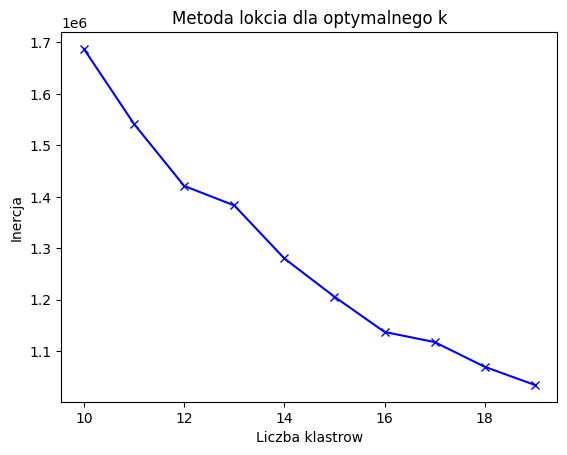

In [108]:
# Plotting the Elbow Curve
plt.plot(K, inertia, 'bx-')
plt.xlabel('Liczba klastrow')
plt.ylabel('Inercja')
plt.title('Metoda lokcia dla optymalnego k')
plt.show()

In [109]:
optimal_k = 14  

#creating model with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# getting centers of clusters
cluster_centers = kmeans.cluster_centers_


In [110]:
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print(cluster_centers_df)

         dur      spkts         dpkts     sbytes        dbytes          rate  \
0   0.247470   0.161545  6.329980e-02   0.067545  4.576742e-03  2.402866e-04   
1   0.290679   0.040031  3.360494e-04   0.005689  1.927408e-04  1.756108e+00   
2   0.057860   0.407539  2.942677e-01   0.048254  1.095128e-01  2.436305e-02   
3   0.510337   0.009987  5.273559e-16   0.000403  4.718448e-15  7.058288e-09   
4   8.628950  58.192685  6.209354e+00  67.655570  2.043038e-01  1.267500e-03   
5   0.204659   0.442448  3.162795e-01   0.032992  1.676493e-02  8.222710e-03   
6   2.033522   0.105185  5.825828e-02   0.010111  9.955319e-03  2.063900e-04   
7   0.473208   0.033746  2.185315e-03   0.007349  1.967524e-04  9.611195e-01   
8   0.101396   0.032169  1.832080e-02   0.008167  1.603427e-03  2.610241e-02   
9   9.400495   9.170167  4.252456e+01   0.348664  4.305711e+01  1.196121e-03   
10  0.195285   0.131696  9.083448e-02   0.040395  2.958823e-02  3.064896e-03   
11  1.063853   3.066055  4.239052e+00   

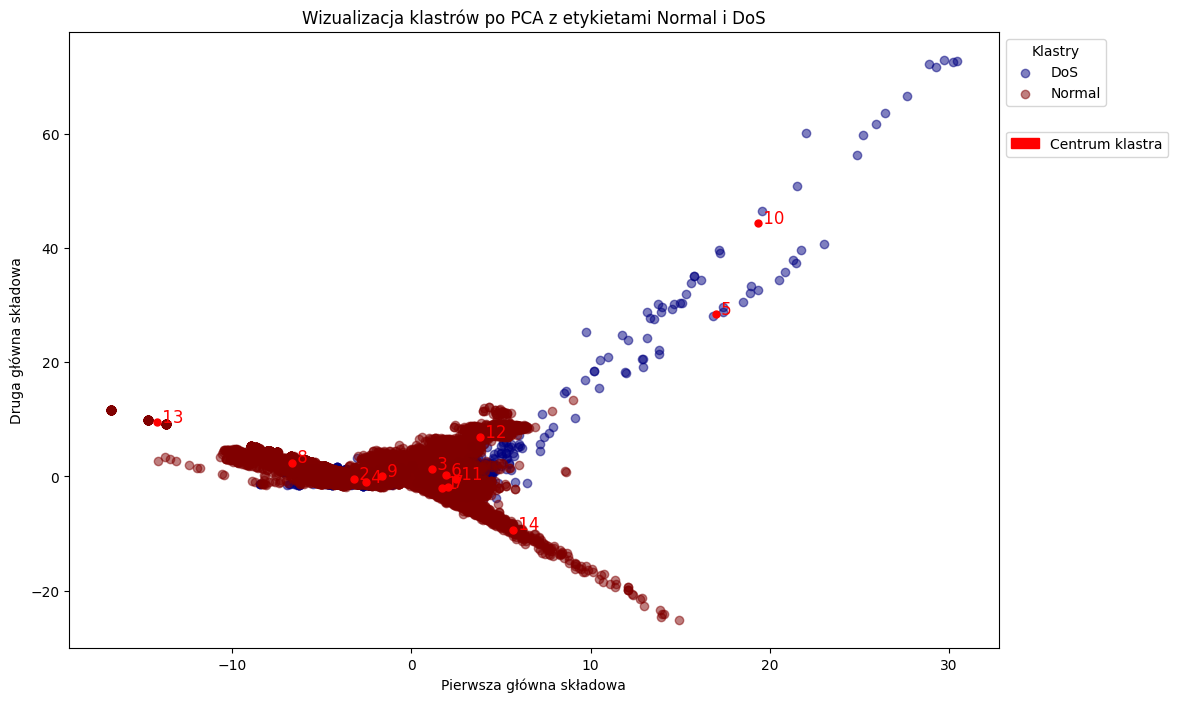

In [112]:
labels_original = data['attack_cat']
# creating color map
unique_labels = np.unique(labels_original)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
label_colors = dict(zip(unique_labels, colors))

# seting plot size
plt.figure(figsize=(12, 8))

# Coloring normal traffic and DoS traffic
for label, color in label_colors.items():
    indices = labels_original == label
    plt.scatter(X_r[indices, 0], X_r[indices, 1], c=color, alpha=0.5, label=label)

# adding cluster centers to plot and transforming them to 2d
centers_r = pca.transform(kmeans.cluster_centers_)
for i, center in enumerate(centers_r):
    plt.scatter(center[0], center[1], c='red', marker='.', s=100)  # Cluster centers
    plt.text(center[0], center[1], ' ' + str(i+1), color='red', fontsize=12)

plt.title('Wizualizacja klastrów po PCA z etykietami Normal i DoS')
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')

# Creating legend
cluster_legend = plt.legend(title="Klastry", loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().add_artist(cluster_legend)

# adding centers of cluster to legend
center_legend_handles = [mpatches.Patch(color='red', label='Centrum klastra')]
plt.legend(handles=center_legend_handles, loc='upper left', bbox_to_anchor=(1, 0.85))

plt.show()